<a href="https://colab.research.google.com/github/henriquepgomide/blog-youtube-tutorials/blob/master/notebooks/Pycaret%3A_aprendizagem_de_maquinas_para_quem_tem_prazo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/3gQtwjX.png)

# PyCaret - Aprendizagem de Máquinas para quem tem prazo 







## 0.0 - Introdução

Olá! Nosso objetivo hoje será apresentar a biblioteca PyCaret, que facilita a 
implementação de modelos de aprendizagem de máquinas

1.   Apresentar biblioteca PyCaret
2.   Instalar PyCaret
3.   Processar dados
4.   Treinar modelos
5.   Comparar resultados dos modelos
6.   Conclusões


### Banco de dados

Iremos usar o banco de dados 'insurance' para treinar nosso modelo. Você
encontra o banco neste link: 

* https://raw.githubusercontent.com/zetta-health/exp-curso-python-saude/master/data/insurance.csv

#### Descrição do banco de dados

* age...........Idade em anos
* sex...........Sexo
* bmi...........Índice de Massa Corporal
* children ...Número de crianças 
* smoker.....Se é fumante
* region.......Região dos Estados Unidos
* charges....Sinistro em unidade monetária

## 1.0 - PyCaret, o que é?


PyCaret é uma biblioteca de código aberto e que necessita pouco código de programação para preparar seus dados e desenvolver seu modelo de aprendizagem de máquinas no seu ambiente de preferência. Ela funciona até no PowerBI :)

Para maiores detalhes, consultar o [site oficial](https://pycaret.org/). 

### Vantagens

* Pouco código para implementar algoritmos de aprendizagem supervisionada e não
supervisionada.
* Algoritmos atuais já estão incluídos (e.g., lightGBM)

### Desvantagens

* Documentação incompleta
* Filosofia baterias incluídas carregará pacotes desnecessários

## 2.0 - Instalar PyCaret

Dica: Lembre-se de usar um ambiente virtual. Versão do Python suportada oficialmente 3.6.

In [1]:
# Instalar PyCaret
!pip install pycaret

     |████████████████████████████████| 194kB 8.7MB/s 
     |████████████████████████████████| 61kB 5.0MB/s 
     |████████████████████████████████| 7.0MB 15.1MB/s 
     |████████████████████████████████| 1.2MB 51.9MB/s 
     |████████████████████████████████| 102kB 10.5MB/s 
     |████████████████████████████████| 81kB 8.1MB/s 
     |████████████████████████████████| 389kB 56.2MB/s 
     |████████████████████████████████| 63.9MB 58kB/s 
     |████████████████████████████████| 266kB 54.1MB/s 
     |████████████████████████████████| 1.6MB 40.2MB/s 
     |████████████████████████████████| 3.3MB 46.3MB/s 
     |████████████████████████████████| 133kB 56.0MB/s 
     |████████████████████████████████| 235kB 54.9MB/s 
     |████████████████████████████████| 2.1MB 45.5MB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
     |████████████████████████████████| 552kB 46.9MB/s 
     |████████████████████████████████| 6.4MB 54.0MB/s 
     |████████████████████████████████| 604kB 47.5MB/s 


In [1]:
# Carregar bibliotecas
import numpy as np
import pandas as pd
from pycaret.regression import *
from sklearn.model_selection import train_test_split
import pycaret
from pycaret.regression import *  
from pycaret.utils import enable_colab

## 3.0 Processar dados


1.   Carregar dados
2.   Separar dados para treino e teste.

In [2]:
URL = 'https://raw.githubusercontent.com/zetta-health/exp-curso-python-saude/master/data/insurance.csv'
df = pd.read_csv(URL)
df.shape

(1338, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Separar banco de dados
train, validation = train_test_split(df, test_size=0.2,
                                     random_state=42)

In [5]:
# Regressão ou classificação?
# Documentação SETUP https://pycaret.org/setup/
# Documentação para método setup regression 
#     https://pycaret.org/regression/

reg = setup(data = train, 
              target = 'charges', 
              train_size = 0.7)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,648
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1070, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## 4.0 Treinar e Comparar Modelos

Vamos olhar a documentação, antes de iniciar o treino.


```
compare_models(blacklist = None, fold = 10,  round = 4,  sort = ‘R2’, turbo = True)
```

Documentação: https://pycaret.org/regression/ 

In [6]:
# Treinar modelos
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,2869.504300,24904950.436400,4880.079200,0.813900,0.467100,0.340700
1,Gradient Boosting Regressor,2943.006500,25808075.173600,4975.009700,0.807500,0.474800,0.348500
2,CatBoost Regressor,2957.525500,25918632.974600,4998.382700,0.806500,0.490500,0.348000
3,Random Forest,3042.991200,27209508.556500,5108.564100,0.798000,0.483500,0.362500
4,Light Gradient Boosting Machine,3201.181600,27464267.513700,5148.050700,0.794500,0.562100,0.397600
5,Extra Trees Regressor,3024.253600,30270676.677200,5367.993500,0.776900,0.485900,0.351400
6,AdaBoost Regressor,4497.526600,31970376.268300,5609.154600,0.764800,0.645300,0.752800
7,Ridge Regression,4393.577400,39715059.774800,6246.761600,0.706800,0.564800,0.435400
8,Lasso Least Angle Regression,4374.046000,39702001.897900,6246.235400,0.706800,0.562500,0.432800
9,Bayesian Ridge,4390.475400,39720367.259700,6247.112800,0.706800,0.566800,0.434700


In [8]:
# Criar Modelo
xgboost_tuned = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3449.1266,3.743236e+07,6118.1989,0.7947,0.4893,0.3374
1,3256.5953,3.142414e+07,5605.7242,0.8116,0.4821,0.3829
2,2718.8727,1.959818e+07,4426.9836,0.8860,0.4829,0.3311
3,2186.0609,1.395886e+07,3736.1556,0.8953,0.4286,0.3608
4,2934.7512,3.220774e+07,5675.1866,0.7864,0.4971,0.3917
5,1994.8718,8.409910e+06,2899.9845,0.9476,0.3483,0.2835
6,2848.2389,2.070318e+07,4550.0748,0.8493,0.4949,0.3540
7,3778.1513,4.170723e+07,6458.1136,0.5524,0.5792,0.3514
8,2961.4232,2.366993e+07,4865.1751,0.8397,0.4648,0.3006
9,2566.9514,1.993797e+07,4465.1952,0.7759,0.4038,0.3140


In [ ]:
# Ver parâmetros do melhor modelo
print(xgboost_tuned)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=5081,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)


In [ ]:
# Avaliar parâmetros
plot_model(xgboost_tuned, plot='parameter')

,Parameters
base_score,0.5
booster,gbtree
colsample_bylevel,1
colsample_bynode,1
colsample_bytree,1
gamma,0
importance_type,gain
learning_rate,0.1
max_delta_step,0
max_depth,3


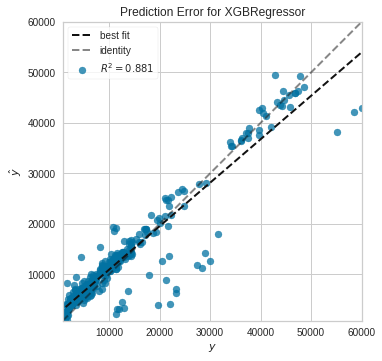

In [9]:
# Comparar predições e resultados do banco de teste
plot_model(xgboost_tuned, plot='error')

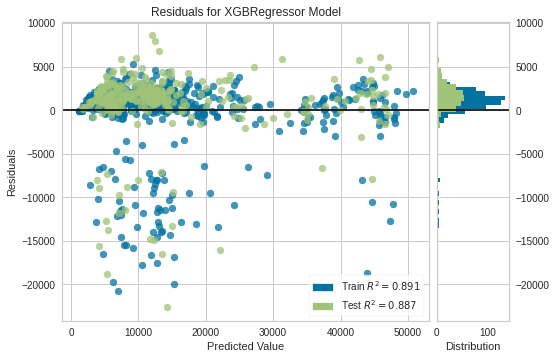

In [ ]:
# Comparar os resíduos
plot_model(xgboost_tuned, plot='residuals')

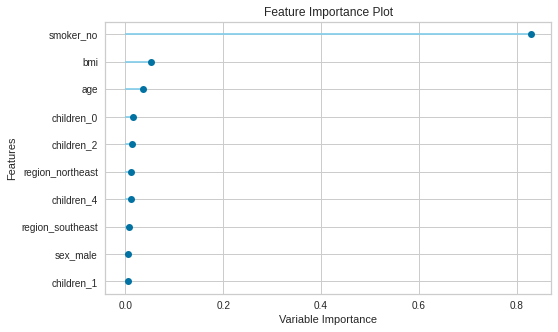

In [13]:
plot_model(xgboost_tuned, 'feature')

In [12]:
# Interpretar o Modelo
interpret_model(xgboost_tuned)
# Damm...

AssertionError: ignored

In [14]:
xgboost_tuned_holdout = predict_model(xgboost_tuned, data=validation)

In [16]:
xgboost_tuned_holdout

,age,sex,bmi,children,smoker,region,charges,Label
0,45,female,25.175,2,no,northeast,9095.06825,12677.477539
1,36,female,30.020,0,no,northwest,5272.17580,6195.082031
2,64,female,26.885,0,yes,northwest,29330.98315,28448.164062
3,46,male,25.745,3,no,northwest,9301.89355,9626.004883
4,19,male,31.920,0,yes,northwest,33750.29180,34761.199219
...,...,...,...,...,...,...,...,...
263,63,male,35.090,0,yes,southeast,47055.53210,45677.195312
264,58,female,27.170,0,no,northwest,12222.89830,13063.710938
265,38,male,28.025,1,no,northeast,6067.12675,7428.504883
266,54,female,47.410,0,yes,southeast,63770.42801,46002.273438


In [ ]:
# Finalize model
final_xgboost_tuned = finalize_model(xgboost_tuned)

In [ ]:
# Save Model
save_model(final_xgboost_tuned, 'snf_saved_04072020')

Transformation Pipeline and Model Succesfully Saved


## 5.0 Conclusões

* PyCaret oferece um rápido caminho para desenvolvimento de protótipos
* No entanto, não substituí as implementações scikit.learn, numpy e pandas.